In [215]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [261]:
gamma = 5.0/3.0
B0 = 1.0
rho0 = 1.0
sheat_thickness = 1.0
p0 = B0**2 / 2.0
beta_upstream = 2.0
VA = B0 / np.sqrt(rho0)
eta = 1e-8 * (2.0 * np.pi)**4
x_max = 5 * 2 * np.pi * sheat_thickness / eta**0.25
y_max = 10.0 * sheat_thickness
dx = sheat_thickness / 16.0
dy = sheat_thickness / 16.0
nx = int(x_max / dx) + 1
ny = int(2.0 * y_max / dy)
dt = 0.0
CFL = 0.7
x = np.arange(0.0, x_max, dx)
y = np.arange(-y_max, y_max, dy)
X, Y = np.meshgrid(x, y)

S = sheat_thickness * VA / eta

print(f"Lundquist number = {S:.1f}")
print(f"box size {nx} X {ny}")

Lundquist number = 64162.4
box size 8000 X 320


(-9.9999999999, 9.9999999999)

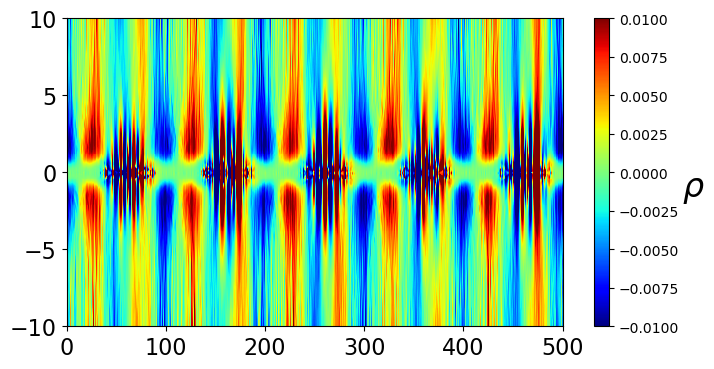

In [253]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)

dirname = "results_tearing_1e-8"
#log = np.loadtxt(f"{dirname}/log_plasmoid.txt", delimiter=',')
step = 10000
filename = f"{dirname}/tearing_{step}.bin"
with open(filename, 'rb') as f:
    U = np.fromfile(f, dtype=np.float32)
U = U.reshape(nx, ny, 8).T

rho = U[0, :, :]
u = U[1, :, :] / rho 
v = U[2, :, :] / rho 
w = U[3, :, :] / rho 
Bx = U[4, :, :]
By = U[5, :, :]
Bz = U[6, :, :]
e = U[7, :, :]
p = (gamma-1) * (e - rho*(u**2+v**2+w**2)/2 - (Bx**2+By**2+Bz**2)/2)
magnetic_pressure = 1/2 * (Bx**2+By**2+Bz**2)
pT = p + magnetic_pressure

contour = ax1.pcolormesh(X, Y, By, vmin=-0.01, vmax=0.01, cmap='jet')
cbar = plt.colorbar(contour, ax=ax1)
cbar.set_label(r"$\rho$", fontsize=24, rotation=0, labelpad=10)
quiver_interval = 20
#ax1.quiver(X[::quiver_interval, ::quiver_interval], Y[::quiver_interval, ::quiver_interval], 
#        u[::quiver_interval, ::quiver_interval], v[::quiver_interval, ::quiver_interval],
#        scale=2.0, color='white')

#ax1.text(0.8, 1.02, f"t = {log[int(step/100)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
ax1.tick_params(labelsize=16)
ax1.set_xlim(+1e-10, x_max-1e-10)
ax1.set_ylim(-y_max+1e-10, y_max-1e-10)

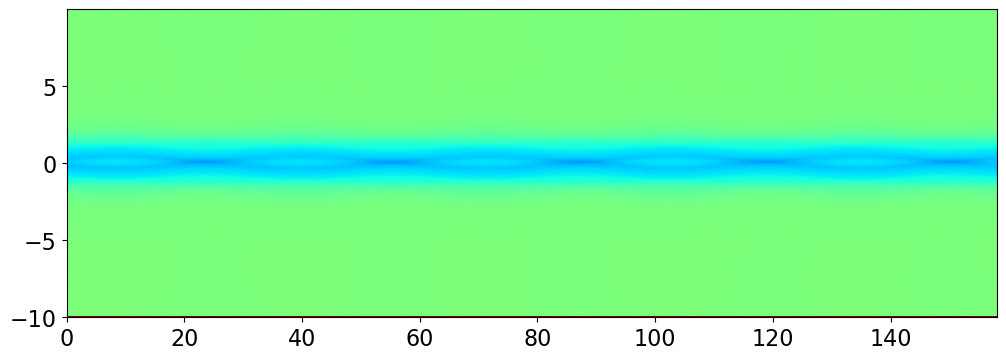

In [126]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)

dirname = "results_tearing_1e-6"
step = 10000
filename = f"{dirname}/tearing_{step}.bin"
with open(filename, 'rb') as f:
    U = np.fromfile(f, dtype=np.float32)
U = U.reshape(nx, ny, 8).T

Bx = U[4, :, :]
By = U[5, :, :]
Bx = 0.5 * (Bx + np.roll(Bx, 1, axis=1))
By = 0.5 * (By + np.roll(By, 1, axis=0))
currentZ = (By - np.roll(By, 1, axis=1)) / dx - (Bx - np.roll(Bx, 1, axis=0)) / dy 

contour = ax1.pcolormesh(X, Y, currentZ / B0 / sheat_thickness, vmin=-2.0, vmax=2.0, cmap='jet')
#cbar = plt.colorbar(contour, ax=ax1)
#cbar.set_label(r"$j_z$", fontsize=24, rotation=0, labelpad=10)
#quiver_interval = 20
#ax1.quiver(X[::quiver_interval, ::quiver_interval], Y[::quiver_interval, ::quiver_interval], 
#        u[::quiver_interval, ::quiver_interval], v[::quiver_interval, ::quiver_interval],
#        scale=2.0, color='white')

#ax1.text(0.8, 1.02, f"t = {log[int(step/100)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
ax1.tick_params(labelsize=16)
#ax1.set_xlim(+1e-10, x_max/5-1e-10)
#ax1.set_ylim(-1+1e-10, 1-1e-10)
#ax1.set_aspect("equal")

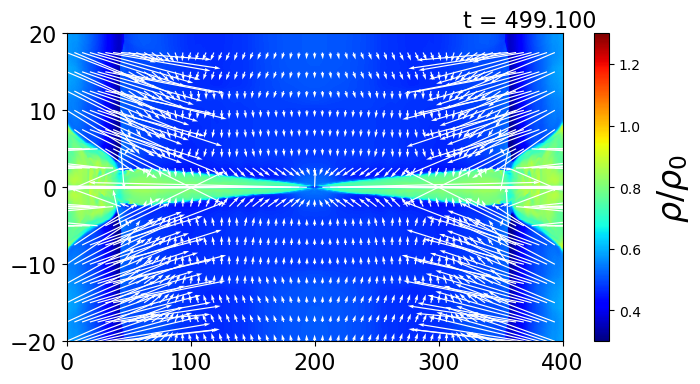

In [5]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)

dirname = "results"
log = np.loadtxt(f"{dirname}/log_plasmoid.txt", delimiter=',')
total_steps = int(log[-1][0])
interval = 100
for step in range(0, total_steps+interval, interval):
    ax1.clear()

    filename = f"{dirname}/plasmoid_{step}.bin"
    with open(filename, 'rb') as f:
        U = np.fromfile(f, dtype=np.float64)
    U = U.reshape(nx, ny, 8).T

    rho = U[0, :, :]
    u = U[1, :, :] / rho 
    v = U[2, :, :] / rho 
    w = U[3, :, :] / rho 
    Bx = U[4, :, :]
    By = U[5, :, :]
    Bz = U[6, :, :]
    e = U[7, :, :]
    p = (gamma-1) * (e - rho*(u**2+v**2+w**2)/2 - (Bx**2+By**2+Bz**2)/2)
    magnetic_pressure = 1/2 * (Bx**2+By**2+Bz**2)
    pT = p + magnetic_pressure

    contour = ax1.pcolormesh(X, Y, rho, vmin=0.3, vmax=1.3, cmap='jet')
    if step == 0:
        cbar = plt.colorbar(contour, ax=ax1)
        cbar.set_label(r"$\rho / \rho_0$", fontsize=24, rotation=90, labelpad=10)
    quiver_interval_x = 20
    quiver_interval_y = 50
    ax1.quiver(X[::quiver_interval_x, ::quiver_interval_y], Y[::quiver_interval_x, ::quiver_interval_y], 
            u[::quiver_interval_x, ::quiver_interval_y], v[::quiver_interval_x, ::quiver_interval_y],
            scale=2.0, color='white')

    ax1.text(0.8, 1.02, f"t = {log[int(step/100)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
    ax1.tick_params(labelsize=16)
    ax1.set_xlim(0.0, x_max+1e-10)
    ax1.set_ylim(-y_max, y_max+1e-10)

    fig.savefig(f"pictures/{step}.png", dpi=200)


filename = "plasmoid_rho.mp4"
img = cv2.imread(f'./pictures/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 10.0
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=filename, fourcc=fourcc, fps=fps, frameSize=framesize)

for step in range(0, total_steps+interval, interval):
    img = cv2.imread(f'./pictures/{step}.png')
    video.write(img)
video.release()

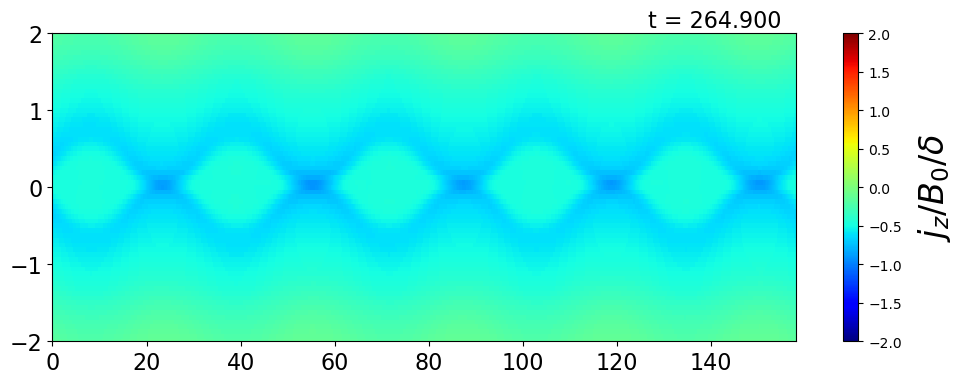

In [133]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)

dirname = "results_tearing_1e-6"
log = np.loadtxt(f"{dirname}/log_tearing.txt", delimiter=',')
total_steps = int(log[-1][0])
interval = 500
for step in range(0, total_steps+interval, interval):
    ax1.clear()

    filename = f"{dirname}/tearing_{step}.bin"
    with open(filename, 'rb') as f:
        U = np.fromfile(f, dtype=np.float32)
    U = U.reshape(nx, ny, 8).T

    rho = U[0, :, :]
    u = U[1, :, :] / rho 
    v = U[2, :, :] / rho 
    Bx = U[4, :, :]
    By = U[5, :, :]
    Bx = 0.5 * (Bx + np.roll(Bx, 1, axis=1))
    By = 0.5 * (By + np.roll(By, 1, axis=0))
    currentZ = (By - np.roll(By, 1, axis=1)) / dx - (Bx - np.roll(Bx, 1, axis=0)) / dy 

    contour = ax1.pcolormesh(X, Y, currentZ / B0 / sheat_thickness, vmin=-2.0, vmax=2.0, cmap='jet')
    if step == 0:
        cbar = plt.colorbar(contour, ax=ax1)
        cbar.set_label(r"$j_z / B_0 / \delta$", fontsize=24, rotation=90, labelpad=10)
    quiver_interval_x = 20
    quiver_interval_y = 50
    #ax1.quiver(X[::quiver_interval_x, ::quiver_interval_y], Y[::quiver_interval_x, ::quiver_interval_y], 
    #        u[::quiver_interval_x, ::quiver_interval_y], v[::quiver_interval_x, ::quiver_interval_y],
    #        scale=2.0, color='black')

    ax1.text(0.8, 1.02, f"t = {log[int(step/interval)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
    ax1.tick_params(labelsize=16)
    ax1.set_xlim(0.0, x_max+1e-10)
    ax1.set_ylim(-2, 2+1e-10)

    fig.savefig(f"pictures/{step}.png", dpi=200)


filename = "tearing_jz_1e-6.mp4"
img = cv2.imread(f'./pictures/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 5.0
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=filename, fourcc=fourcc, fps=fps, frameSize=framesize)

for step in range(0, total_steps+interval, interval):
    img = cv2.imread(f'./pictures/{step}.png')
    video.write(img)
video.release()

線形成長率について

In [262]:
dirname = "results_tearing_1e-8"
log = np.loadtxt(f"{dirname}/log_tearing.txt", delimiter=',')
By_FFT_total = np.zeros([41, nx])
total_steps = int(log[-1][0])
interval = 500

t = np.zeros(41)

for step in range(0, total_steps+interval, interval):
    t[int(step/interval)] = float(log[int(step/interval)][1])

    filename = f"{dirname}/tearing_{step}.bin"
    with open(filename, 'rb') as f:
        U = np.fromfile(f, dtype=np.float32)
    U = U.reshape(nx, ny, 8).T

    By = U[5, :, :]

    By_FFT_total[int(step/interval), :] = np.fft.fft(By[int(ny / 2), :] * np.hanning(nx))

C:\Users\keita\AppData\Local\Temp\ipykernel_11720\3844003150.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  By_FFT_total[int(step/interval), :] = np.fft.fft(By[int(ny / 2), :] * np.hanning(nx))


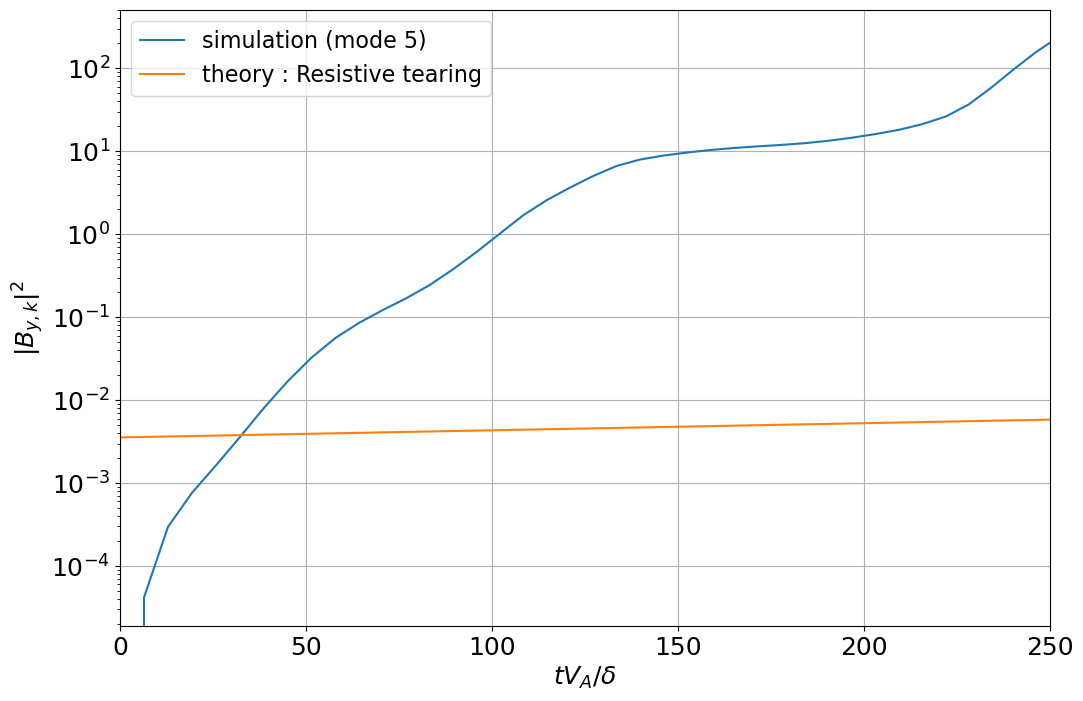

In [279]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

eta = 1e-8 * (2.0 * np.pi)**4
S = 1.0 / eta
growth_rate_tearing = 1.0 * S ** (-0.5)

ax1.plot(t, np.abs(By_FFT_total[:, 5])**2, label=f"simulation (mode 5)") 
ax1.plot(t, np.abs(By_FFT_total[5, 5])**2 * np.exp(1/2 * growth_rate_tearing * t), label="theory : Resistive tearing")

ax1.set_yscale('log')
ax1.set_xlim(0, 250)
#ax1.set_ylim(1e-2, 1e2)
ax1.set_xlabel(r"$t V_A / \delta$", fontsize=18)
ax1.set_ylabel(r"$|B_{y, k}|^2$", fontsize=18)
ax1.tick_params(labelsize=18)
ax1.grid()
ax1.legend(loc="upper left", fontsize=16)
fig.savefig("resistive_tearing_growth_rate_1e-8.png", dpi=200)